 ## Классификация изображений цифр (нейронные сети) с обучением

In [2]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

# Framework

In [3]:
# (re-)load layers
%run homework_modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

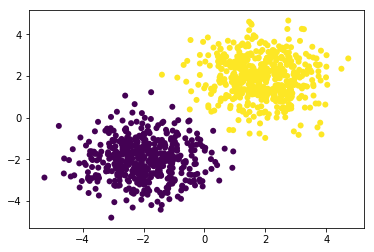

In [4]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [5]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [6]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [7]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

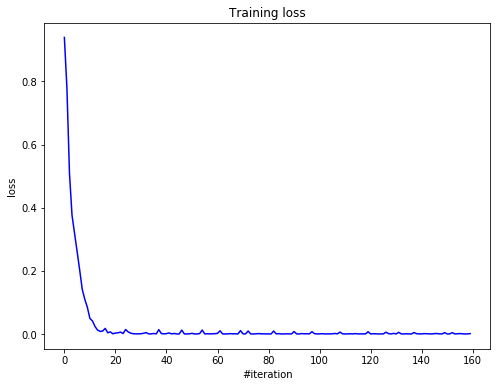

Current loss: 0.001187


In [8]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        #print(predictions.shape)
        #print(y_batch.shape)
        loss = criterion.forward(predictions, y_batch)
        
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    #Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [8]:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/spring2019/homework01/mnist.py -O mnist.py

--2019-04-10 17:43:33--  https://raw.githubusercontent.com/yandexdataschool/Practical_DL/spring2019/homework01/mnist.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2697 (2,6K) [text/plain]
Saving to: ‘mnist.py’

mnist.py            100%[===================>]   2,63K  --.-KB/s    in 0s      

2019-04-10 17:43:35 (41,3 MB/s) - ‘mnist.py’ saved [2697/2697]



In [9]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

One-hot encode the labels first.

In [10]:
one_hot_y_train = np.zeros((y_train.shape[0], 10))
one_hot_y_train[np.arange(y_train.shape[0]), y_train] = 1
one_hot_y_test = np.zeros((y_test.shape[0], 10))
one_hot_y_test[np.arange(y_test.shape[0]), y_test] = 1

- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison. Write your personal opinion on the activation functions, think about computation times too. Plot the losses both from activation functions comparison comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking. ***2.5 points***
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions. Plot the losses both for the `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.  Does `BatchNormalization` help? ***2.5 points***

- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better? ***2.5 points***
- Increase the number of parameters in the network. Try inserting the Dropout layer. Compare the validation performance and the gap between test and validation performances for the two experiments (with and without Dropout). Compare the loss plots. Which one converges slower? ***2.5 points***


# Different activations

In [11]:
def train_network(net, X, y,criterion,optimizer_state, optimizer_config, n_epoch, batch_size):
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
            #print(x_batch.shape)
            x_batch = x_batch.reshape(-1, 784)
            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            #print(predictions.shape)
            #print(y_batch.shape)
            #print(y_batch.shape)
            loss = criterion.forward(predictions, y_batch)
            #print(loss)
            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            sgd_momentum(net.getParameters(), 
                         net.getGradParameters(), 
                         optimizer_config,
                         optimizer_state)      

            loss_history.append(loss)
    return (loss_history)

In [12]:
names = ["ReLu", "ELU", "SoftPlus", "LeakyReLU"]
losses =[]
times = []
n_epoch = 50
batch_size = 1024
criterion_relu = ClassNLLCriterion()
relu_net = Sequential()
relu_net.add(Linear(784, 100))
relu_net.add(ReLU())
relu_net.add(Linear(100, 10))
relu_net.add(LogSoftMax())
optimizer_config_relu = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_relu = {}

time_start = time.time()
losses.append(train_network(relu_net, X_train, y_train,criterion_relu, optimizer_state_relu, optimizer_config_relu, n_epoch, batch_size))
times.append(time.time()-time_start)

criterion_elu = ClassNLLCriterion()
elu_net = Sequential()
elu_net.add(Linear(784, 100))
elu_net.add(ELU())
elu_net.add(Linear(100, 10))
elu_net.add(LogSoftMax())
optimizer_config_elu = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_elu = {}

time_start = time.time()
losses.append(train_network(elu_net, X_train, y_train,criterion_elu, optimizer_state_elu, optimizer_config_elu, n_epoch, batch_size))
times.append(time.time()-time_start)

criterion_sp = ClassNLLCriterion()
softplus_net = Sequential()
softplus_net.add(Linear(784, 100))
softplus_net.add(SoftPlus())
softplus_net.add(Linear(100, 10))
softplus_net.add(LogSoftMax())
optimizer_config_sp = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_sp = {}

time_start = time.time()
losses.append(train_network(softplus_net, X_train, y_train,criterion_sp, optimizer_state_sp, optimizer_config_sp, n_epoch, batch_size))
times.append(time.time()-time_start)

criterion_lr = ClassNLLCriterion()
lr_net = Sequential()
lr_net.add(Linear(784, 100))
lr_net.add(LeakyReLU())
lr_net.add(Linear(100, 10))
lr_net.add(LogSoftMax())
optimizer_config_lr = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_lr = {}

time_start = time.time()
losses.append(train_network(lr_net, X_train, y_train,criterion_lr, optimizer_state_lr, optimizer_config_lr, n_epoch, batch_size))
times.append(time.time()-time_start)


In [13]:
times

[25.05051851272583, 38.28289437294006, 23.209243297576904, 26.60644793510437]

In [14]:
losses = np.array(losses).T

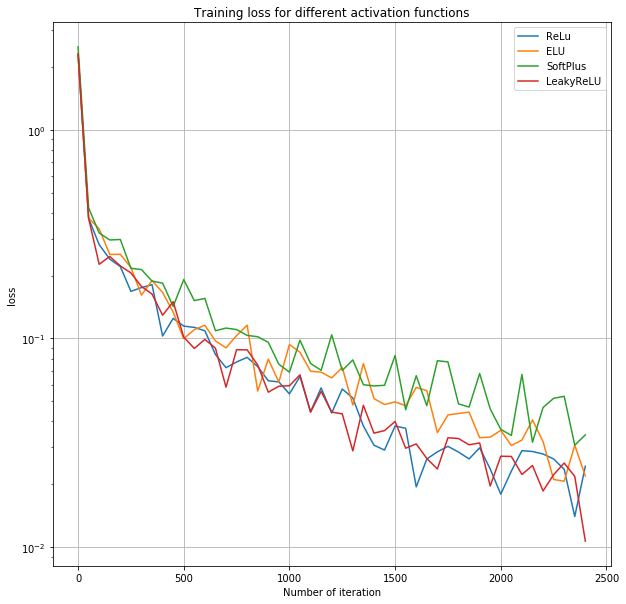

In [15]:
plt.figure(figsize=(10,10))
plt.title("Training loss for different activation functions")
plt.xlabel("Number of iteration")
plt.ylabel("loss")
plt.semilogy(np.arange(losses.shape[0])[::50],losses[::50, :])
plt.grid()
plt.legend(names)
plt.show()


After compare accuracy and qulity of such activation function one can come to conclusion, that 0.05 is line, where loss is distinguishable. The fastest activations functions are ReLu and SoftPlus, and the hardest is ELU, because we need to calculate exponents.

In [16]:
#Validation accuracy
accuracy_ac=[]
accuracy_ac.append((relu_net.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
accuracy_ac.append((elu_net.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
accuracy_ac.append((softplus_net.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
accuracy_ac.append((lr_net.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)

In [17]:
print(accuracy_ac)

[97.74000000000001, 97.53, 97.44, 97.72999999999999]


# Batch Normalization

In [18]:
names_bn = ["With BN", "Without BN"]
losses_bn =[]
times_bn = []
n_epoch = 100
batch_size = 1024
criterion_bn = ClassNLLCriterion()
net_bn = Sequential()
net_bn.add(Linear(784, 100))
net_bn.add(BatchNormalization(alpha=1))
net_bn.add(ChannelwiseScaling(100))
net_bn.add(ReLU())
net_bn.add(Linear(100, 10))
net_bn.add(LogSoftMax())
optimizer_config_bn = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_bn = {}


criterion_wn = ClassNLLCriterion()
net_wn = Sequential()
net_wn.add(Linear(784, 100))
net_wn.add(ReLU())
net_wn.add(Linear(100, 10))
net_wn.add(LogSoftMax())
optimizer_config_wn = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_wn = {}

time_start = time.time()
losses_bn.append(train_network(net_bn, X_train, y_train,criterion_bn, optimizer_state_bn, optimizer_config_bn, n_epoch, batch_size))
times_bn.append(time.time()-time_start)

time_start = time.time()
losses_bn.append(train_network(net_wn, X_train, y_train,criterion_wn, optimizer_state_wn, optimizer_config_wn, n_epoch, batch_size))
times_bn.append(time.time()-time_start)

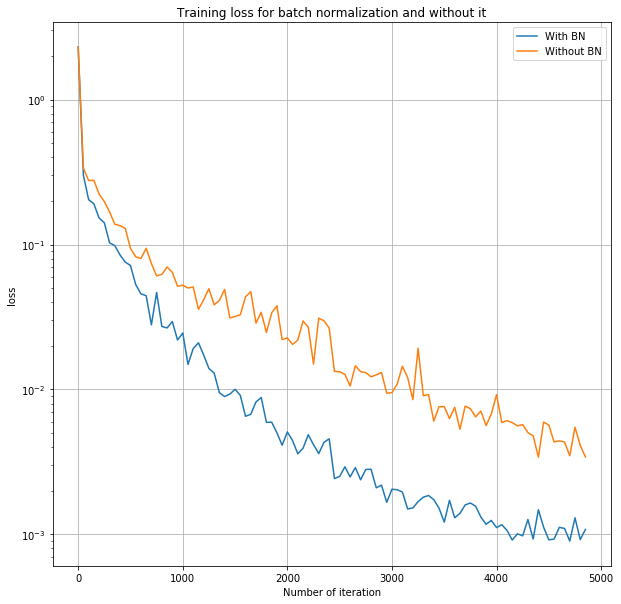

In [19]:
losses_bn = np.array(losses_bn).T
plt.figure(figsize=(10,10))
plt.title("Training loss for batch normalization and without it")
plt.xlabel("Number of iteration")
plt.ylabel("loss")
plt.semilogy(np.arange(losses_bn.shape[0])[::50],losses_bn[::50, :])
plt.grid()
plt.legend(names_bn)
plt.show()

With Batch Normalization network can achieve more accuaracy and converge faster. That's why network uses normalized data.

In [20]:
#Validation accuracy
accuracy_bn=[]
accuracy_bn.append((net_bn.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
accuracy_bn.append((net_wn.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)

In [21]:
print(accuracy_bn)

[96.99, 97.82]


# Different optimizers

In [22]:
def train_network_diff_optim(net, X, y,criterion,optimizer_state, optimizer_config, n_epoch, batch_size, optim_name):
    loss_history = []

    for i in range(n_epoch):
        for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
            #print(x_batch.shape)
            x_batch = x_batch.reshape(-1, 784)
            net.zeroGradParameters()

            # Forward
            predictions = net.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
            #print(loss)
            # Backward
            dp = criterion.backward(predictions, y_batch)
            net.backward(x_batch, dp)

            # Update weights
            if(optim_name=="sgd"):
                sgd_momentum(net.getParameters(), 
                             net.getGradParameters(), 
                             optimizer_config,
                             optimizer_state)
            else:
                adam_optimizer(net.getParameters(), 
                             net.getGradParameters(), 
                             optimizer_config,
                             optimizer_state)

            loss_history.append(loss)
    return (loss_history)

In [23]:
names_bn = ["SGD", "Adam"]
losses_opt =[]
times_opt = []
n_epoch = 100
batch_size = 1024
criterion_bn = ClassNLLCriterion()
net_bn = Sequential()
net_bn.add(Linear(784, 100))
net_bn.add(BatchNormalization(alpha=1))
net_bn.add(ChannelwiseScaling(100))
net_bn.add(ReLU())
net_bn.add(Linear(100, 10))
net_bn.add(LogSoftMax())
optimizer_config_bn = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_bn = {}

time_start = time.time()
losses_opt.append(train_network_diff_optim(net_bn, X_train, y_train,criterion_bn, optimizer_state_bn, optimizer_config_bn, n_epoch, batch_size, 'sgd'))
times_opt.append(time.time()-time_start)

optimizer_config_bn = {'learning_rate': 1e-3, 'beta1': 0.9, 'beta2':0.999, 'epsilon':1e-8}
optimizer_state_bn = {}

time_start = time.time()
losses_opt.append(train_network_diff_optim(net_bn, X_train, y_train,criterion_bn, optimizer_state_bn, optimizer_config_bn, n_epoch, batch_size, 'adam'))
times_opt.append(time.time()-time_start)

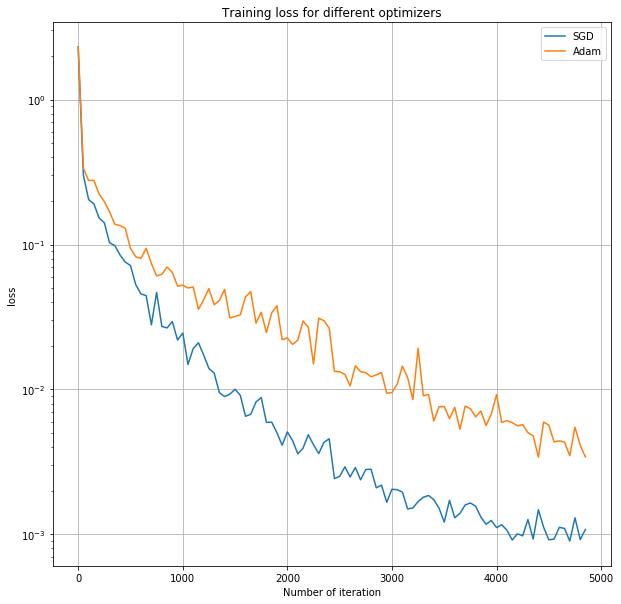

In [24]:
losses_opt = np.array(losses_opt).T
plt.figure(figsize=(10,10))
plt.title("Training loss for different optimizers")
plt.xlabel("Number of iteration")
plt.ylabel("loss")
plt.semilogy(np.arange(losses_opt.shape[0])[::50],losses_bn[::50, :])
plt.grid()
plt.legend(names_bn)
plt.show()

In [25]:
#Validation accuracy
accuracy_do=[]
accuracy_do.append((net_bn.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
accuracy_do.append((net_wn.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)

In [26]:
print(accuracy_do)

[97.45, 97.82]


# Dropout comparison

In [30]:
names_drop = ["With Dropout", "Without Dropout"]
losses_drop =[]
times_drop = []
n_epoch = 200
batch_size = 1024
criterion_drop = ClassNLLCriterion()
net_drop = Sequential()
net_drop.add(Linear(784, 100))
net_drop.add(Dropout(0.5))
net_drop.add(ReLU())
net_drop.add(Linear(100, 10))
net_drop.add(LogSoftMax())
optimizer_config_drop = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_drop = {}


criterion_reluw = ClassNLLCriterion()
relu_netw = Sequential()
relu_netw.add(Linear(784, 100))
relu_netw.add(ReLU())
relu_netw.add(Linear(100, 10))
relu_netw.add(LogSoftMax())
optimizer_config_reluw = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state_reluw = {}

time_start = time.time()
losses_drop.append(train_network(net_drop, X_train, y_train,criterion_drop, optimizer_state_drop, optimizer_config_drop, n_epoch, batch_size))
times_drop.append(time.time()-time_start)

time_start = time.time()
losses_drop.append(train_network(relu_netw, X_train, y_train,criterion_reluw, optimizer_state_wn, optimizer_config_reluw, n_epoch, batch_size))
times_drop.append(time.time()-time_start)

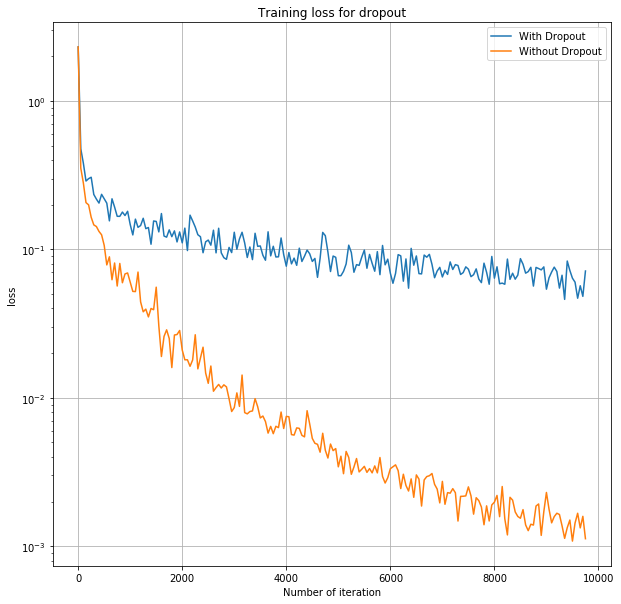

In [31]:
losses_drop = np.array(losses_drop).T
plt.figure(figsize=(10,10))
plt.title("Training loss for dropout")
plt.xlabel("Number of iteration")
plt.ylabel("loss")
plt.semilogy(np.arange(losses_drop.shape[0])[::50],losses_drop[::50, :])
plt.grid()
plt.legend(names_drop)
plt.show()

In [32]:
#Validation accuracy
accuracy_dr=[]
accuracy_dr.append((net_drop.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
accuracy_dr.append((relu_netw.forward(X_test.reshape(-1, 784)).argmax(axis=1) == y_test).mean()*100)
print(accuracy_dr)

[95.45, 97.6]


Dropout has achieved less accuracy, but it is because this type of network is training very slowly. Maybe if one calculated for example $10^4$ epochs it will be better.

# Learning embeddings

**Finally**, use the Contrastive criterion instead of the NLLCriterion to train the embeddings. 
Using the code below, compute the pairwise distances and show the distance histograms for the validation set (or its part). Compute the Bhattacharyya coefficient using the outputs of the plt.hist: $ BC(p,q) = \sum (\sqrt{p_i q_i}) $.

Repeat this for the embeddings trained with the NLLCriterion, compare the results. You may want to try different margins $M$ (hint: $M=10$ should be okay).

 ***3 points***

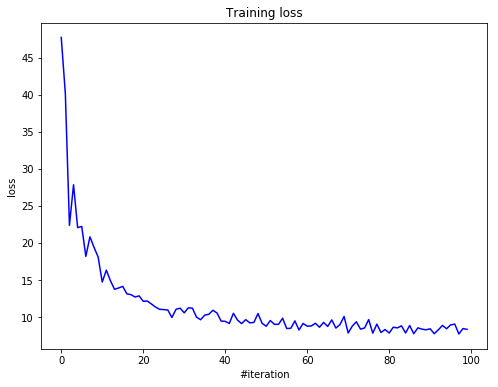

In [15]:
#Distance for Contrastive criterion
criterion =ClassContrastiveCriterion(10)

net = Sequential()
net.add(Linear(784, 100))
net.add(ReLU())
net.add(Linear(100, 10))


print(net)

# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 1
batch_size = 500

loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, y_train), batch_size):
        #print(x_batch.shape)
        x_batch = x_batch.reshape(-1, 784)
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()  

5012521.0 44982479.0


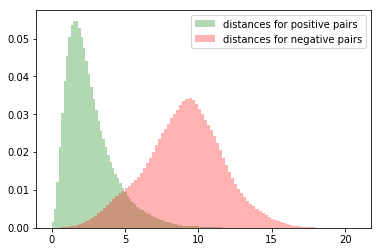

In [16]:
#features : 'number of examples' * 'dimensionality'
pred = net.forward(X_test.reshape(-1, 784))
f = net.modules[-1].output
labels = y_test
import scipy.spatial
#compute pairwise distances
d = scipy.spatial.distance_matrix(f,f)
#extract distances for the 'positive pairs' (same class), 
#extract distances for the 'negarite pairs' (different classes), 
a = np.tile(labels.reshape(len(labels), 1), (1, len(labels)))
b =np.tile(labels.reshape(1, len(labels)), (len(labels), 1))
#labels
c = np.zeros((len(labels), len(labels)))
c[a==b]=1
pind =  np.triu(c, k=1)

c = np.zeros((len(labels), len(labels)))
c[a!=b]=1
nind =  np.triu(c, k=1)

print(np.sum(pind), np.sum(nind))


pd = d[pind == 1]
nd = d[nind == 1]

hp,_,_ =plt.hist(pd, bins=100, color='green', alpha = 0.3, weights = np.ones(len(pd))/len(pd), label = 'distances for positive pairs')
hn,_,_ =plt.hist(nd, bins=100, color='red', alpha = 0.3, weights = np.ones(len(nd))/len(nd),label = 'distances for negative pairs')
plt.legend(loc='best')

bhattacharyya = np.sum(np.sqrt(hp*hn))

In [17]:
print(bhattacharyya)

0.53305260866952


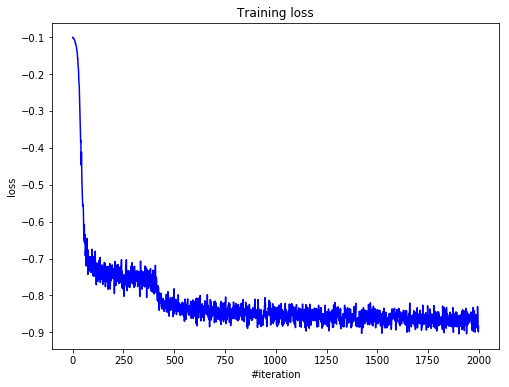

In [18]:
# Your code goes here. ################################################
criterion =ClassNLLCriterion()

net = Sequential()
net.add(Linear(784, 100))
net.add(ReLU())
net.add(Linear(100, 10))
net.add(SoftMax())


print(net)

# Iptimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 500

loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X_train, one_hot_y_train), batch_size):
        #print(x_batch.shape)
        x_batch = x_batch.reshape(-1, 784)
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()  

5012521.0 44982479.0


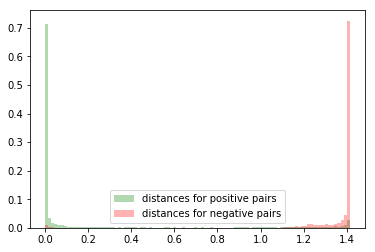

In [19]:
#features : 'number of examples' * 'dimensionality'
pred = net.forward(X_test.reshape(-1, 784))
f = net.modules[-1].output
labels = y_test
import scipy.spatial
#compute pairwise distances
d = scipy.spatial.distance_matrix(f,f)
#extract distances for the 'positive pairs' (same class), 
#extract distances for the 'negarite pairs' (different classes), 
a = np.tile(labels.reshape(len(labels), 1), (1, len(labels)))
b =np.tile(labels.reshape(1, len(labels)), (len(labels), 1))
#labels
c = np.zeros((len(labels), len(labels)))
c[a==b]=1
pind =  np.triu(c, k=1)

c = np.zeros((len(labels), len(labels)))
c[a!=b]=1
nind =  np.triu(c, k=1)

print(np.sum(pind), np.sum(nind))


pd = d[pind == 1]
nd = d[nind == 1]

hp,_,_ =plt.hist(pd, bins=100, color='green', alpha = 0.3, weights = np.ones(len(pd))/len(pd), label = 'distances for positive pairs')
hn,_,_ =plt.hist(nd, bins=100, color='red', alpha = 0.3, weights = np.ones(len(nd))/len(nd),label = 'distances for negative pairs')
plt.legend(loc='best')

bhattacharyya = np.sum(np.sqrt(hp*hn))

In [20]:
print(bhattacharyya)

0.4215053794300565


Contrastive criterion is approacheble to measure data with bhattacharyya distance.